In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
%matplotlib inline
import numpy as np
#loading
(train_X, train_y), (test_X, test_y) = mnist.load_data()

#shape of dataset
print('train_X: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))




Using TensorFlow backend.


train_X: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [2]:
def show(image, title):
    index = 1
    plt.figure(figsize=(10,5))

    for x in zip(image, title):
        image = x[0]
        title = x[1]
        plt.subplot(2, 5, index)
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title(x[1], fontsize = 9)
        index += 1



In [3]:
def create_single_collage(idx_list):
    row1 = np.concatenate((train_X[idx_list[0]], train_X[idx_list[1]]), axis=1)
    row2 = np.concatenate((train_X[idx_list[2]], train_X[idx_list[3]]), axis=1)
    collaged_X = np.concatenate((row1, row2), axis=0)
    collaged_y = np.array([train_y[idx_list[0]],train_y[idx_list[1]],train_y[idx_list[2]],train_y[idx_list[3]]])
    return collaged_X, collaged_y

/opt/anaconda3/envs/gradcam_env/lib/python3.6/site-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


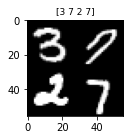

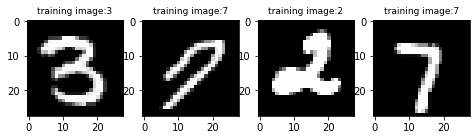

In [4]:
image = []
title = []
idx = []
for i in range(4):
    r = random.randint(1, len(train_X))
    image.append(train_X[r])
    idx.append(r)
    title.append('training image:' + str(train_y[r]))
(X,y) = create_single_collage(idx)
collaged_X = [X]
collaged_y = [y]
show(collaged_X, collaged_y)

show(image, title)

In [5]:
def generate_random_idx_list(l):
    idx_list = random.sample(range(len(train_X)), k=l)
    return np.array(idx_list)

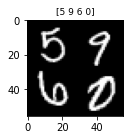

In [6]:
idx_list = generate_random_idx_list(4)
(X,y) = create_single_collage(idx_list)
collaged_X = [X]
collaged_y = [y]
show(collaged_X, collaged_y)

(6000, 56, 56) (6000, 4)


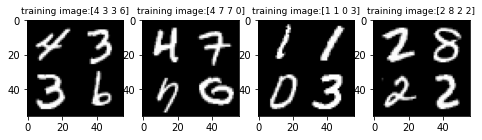

In [9]:
dataset_len =6000
collaged_X = []
collaged_y = []
argmax_y = []
for i in range(dataset_len):
    idx_list = generate_random_idx_list(4)
    (X,y) = create_single_collage(idx_list)
    collaged_X.append(X)
    collaged_y.append(y)
    largest_idx = np.argmax(y)
#     print(largest_idx)
    argmax_y.append(largest_idx)
collaged_X = np.array(collaged_X)
collaged_y = np.array(collaged_y)
argmax_y = np.array(argmax_y)
print(collaged_X.shape, collaged_y.shape)
image = []
title = []
for i in range(4):
    r = random.randint(1, len(collaged_X))
    image.append(collaged_X[r])
    title.append('training image:' + str(collaged_y[r]))

show(image, title)

In [15]:
modified_idx_list = random.sample(range(len(collaged_X)), k=len(collaged_X)//2)
label = np.ones(len(collaged_X))
label[modified_idx_list] = 0
print(np.where(label==0)[0].shape)
print(label.shape)
text = np.zeros(collaged_y.shape)
max_pos_text = []
pos_text = {0:'upper left', 1:'upper right', 2:'bottom left', 3:'bottom right'}
for i in range(len(collaged_X)):
    if i in modified_idx_list:
#         print(collaged_y[i])
        text[i] = (collaged_y[i]+random.randint(1,9))%10
        key = (argmax_y[i]+random.randint(1,3))%4
#         print(argmax_y[i], key)
#         print(text[i])
    else:
        text[i] = collaged_y[i]
        key = argmax_y[i]
    max_pos_text.append(pos_text[key])


text_int = text.astype(int)
print(text_int[:10], collaged_y[:10], max_pos_text[:10], argmax_y[:10])

for i in range(len(collaged_y)):
    if i in modified_idx_list:
        assert((not np.array_equal(collaged_y[i], text_int[i]) ) and label[i]==0)
    else:
        assert(np.array_equal(collaged_y[i], text_int[i]) and label[i]==1)
print('done')

(3000,)
(6000,)
[[2 0 8 7]
 [7 5 8 8]
 [9 7 9 4]
 [1 9 9 4]
 [3 3 2 1]
 [1 3 6 6]
 [8 7 1 7]
 [7 3 0 7]
 [2 0 3 3]
 [6 0 0 4]] [[4 2 0 9]
 [3 1 4 4]
 [9 7 9 4]
 [1 9 9 4]
 [3 3 2 1]
 [1 3 6 6]
 [7 6 0 6]
 [0 6 3 0]
 [6 4 7 7]
 [3 7 7 1]] ['upper left', 'bottom right', 'upper left', 'upper right', 'upper left', 'bottom left', 'bottom right', 'upper left', 'upper right', 'bottom left'] [3 2 0 1 0 2 0 1 2 1]
done


In [16]:
import pickle

In [17]:
# collaged_MNIST_dataset = {'image':collaged_X, 'text':text_int, 'label':label}
# pickle.dump(collaged_MNIST_dataset, open('collaged_MNIST.p','wb'))

collaged_MNIST_dataset = {'image':collaged_X, 'text':max_pos_text, 'label':label}
pickle.dump(collaged_MNIST_dataset, open('collaged_MNIST_maxpostext.p','wb'))

In [18]:
# dataset = pickle.load(open('collaged_MNIST.p','rb'))
# for key in dataset:
#     print(dataset[key][:10])

    
dataset = pickle.load(open('collaged_MNIST_maxpostext.p','rb'))
for key in dataset:
    print(dataset[key][:10])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
['upper left', 'bottom right', 'upper left', 'upper right', 'upper left', 'bottom left', 'bottom right', 'upper left', 'upper right', 'bottom left']
[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
